In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
#Printing Data
df = pd.read_csv('plant.csv')
df.head(10)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
5,sandy,8.627622,bi-weekly,none,20.004858,67.618726,0
6,loam,4.444268,daily,organic,25.984533,69.578952,1
7,clay,6.150794,daily,organic,29.291918,69.480907,0
8,loam,4.695214,bi-weekly,none,28.203948,34.560305,1
9,loam,9.178621,weekly,organic,20.598678,54.721015,1


In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    int64  
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    int64  
 3   Fertilizer_Type   193 non-null    int64  
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 10.7 KB
None


In [29]:
print(df.describe())

        Soil_Type  Sunlight_Hours  Water_Frequency  Fertilizer_Type  \
count  193.000000      193.000000       193.000000       193.000000   
mean     0.984456        6.826484         0.994819         0.943005   
std      0.825862        1.599509         0.787251         0.785192   
min      0.000000        4.033133         0.000000         0.000000   
25%      0.000000        5.477000         0.000000         0.000000   
50%      1.000000        6.833290         1.000000         1.000000   
75%      2.000000        8.241144         2.000000         2.000000   
max      2.000000        9.913903         2.000000         2.000000   

       Temperature    Humidity  Growth_Milestone  
count   193.000000  193.000000        193.000000  
mean     25.076087   58.098927          0.497409  
std       5.354170   12.631799          0.501294  
min      15.200000   30.567682          0.000000  
25%      20.637095   49.300000          0.000000  
50%      25.912336   59.182806          0.000000  
75%

In [5]:
print(df.columns)

Index(['Soil_Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type',
       'Temperature', 'Humidity', 'Growth_Milestone'],
      dtype='object')


<Axes: xlabel='Soil_Type', ylabel='count'>

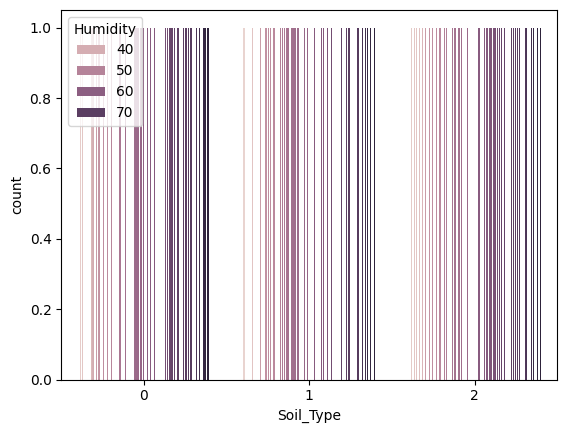

In [31]:
sns.countplot(x=df['Soil_Type'],hue=df['Humidity'])


<Axes: xlabel='Growth_Milestone', ylabel='count'>

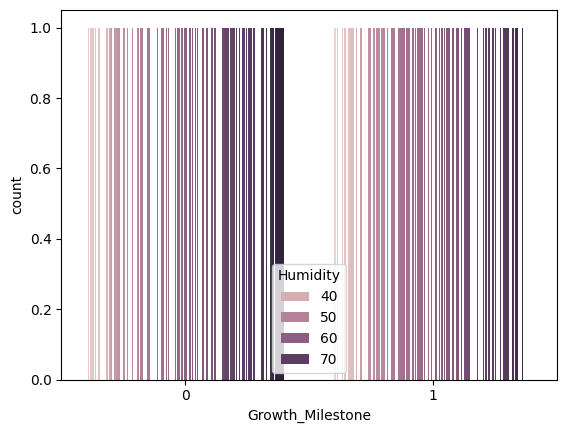

In [32]:
sns.countplot(x=df['Growth_Milestone'],hue=df['Humidity'])

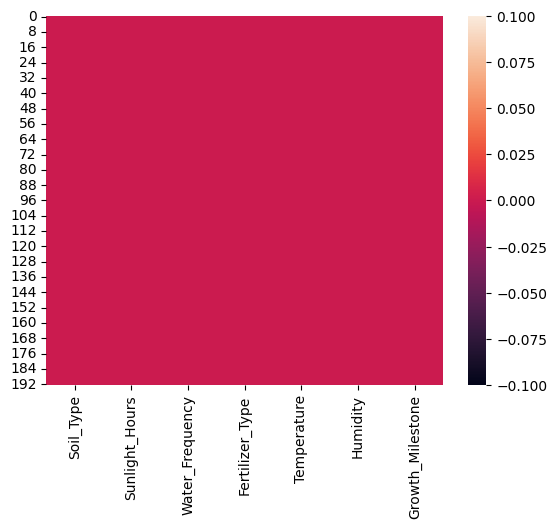

In [33]:
sns.heatmap(df.isna())
plt.show()

In [34]:
df["Growth_Milestone"]

0      0
1      1
2      0
3      0
4      0
      ..
188    0
189    1
190    0
191    1
192    0
Name: Growth_Milestone, Length: 193, dtype: int64

In [35]:
df.groupby('Temperature')[['Growth_Milestone']].mean()

,Growth_Milestone
Temperature,
15.200000,0.0
15.216753,1.0
15.287870,1.0
15.364437,0.0
15.465439,0.0
...,...
34.001239,0.0
34.012143,0.0
34.097306,0.0


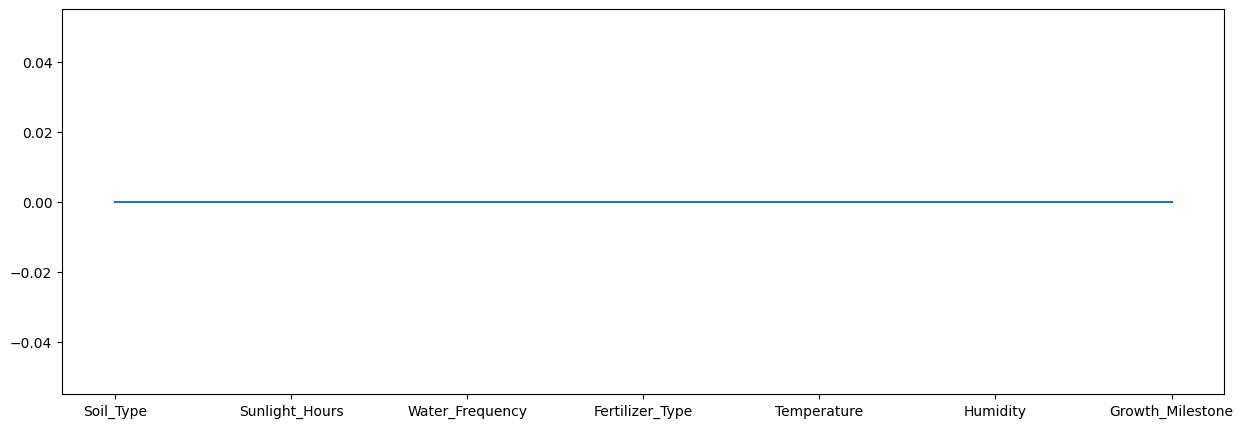

In [36]:
plt.figure(figsize = (15,5))
plt.plot(df.columns, df.isna().sum())
plt.show()

In [37]:
df.isna().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

In [8]:
label_encoders = {}
for col in ['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [9]:
X = df.drop('Growth_Milestone', axis=1)
y = df['Growth_Milestone']


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}


In [38]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state= 1)
log.fit(X_train , y_train)


LogisticRegression(random_state=1)

In [39]:
pred =  print(log.predict(X_test))

[1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0
 0 0]


In [40]:
print(y_test)

45     1
137    1
76     0
144    0
113    0
152    0
15     1
18     1
16     0
9      1
78     1
112    1
66     1
65     1
154    0
30     0
146    0
69     1
111    0
68     0
158    0
135    1
118    0
98     0
67     1
115    1
24     1
159    1
60     1
142    0
114    0
167    1
19     1
90     1
171    1
5      0
155    1
143    1
166    0
Name: Growth_Milestone, dtype: int64


In [15]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    results[name] = acc


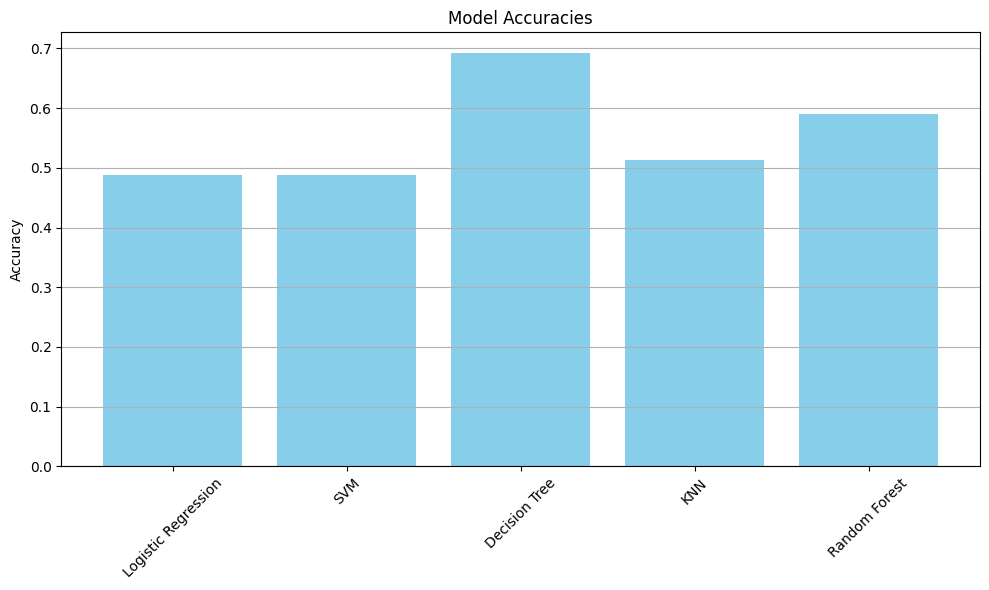

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


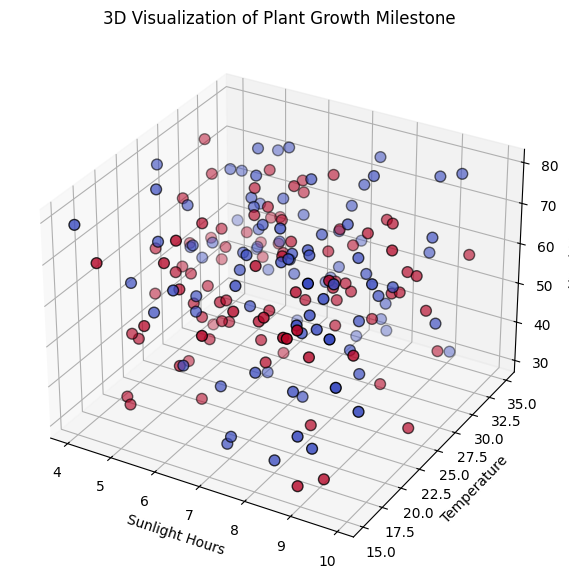

In [17]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['Sunlight_Hours'], df['Temperature'], df['Humidity'], 
                c=df['Growth_Milestone'], cmap='coolwarm', edgecolor='k', s=60)
ax.set_xlabel('Sunlight Hours')
ax.set_ylabel('Temperature')
ax.set_zlabel('Humidity')
ax.set_title('3D Visualization of Plant Growth Milestone')
plt.show()

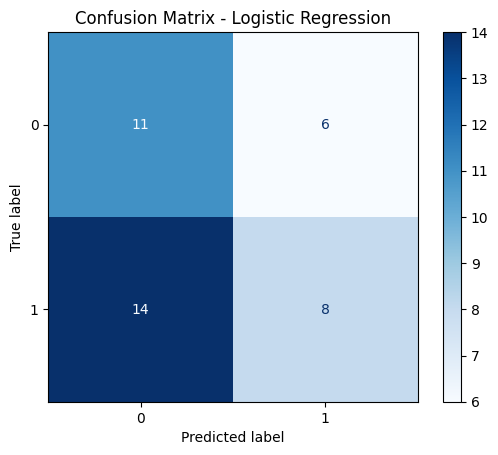

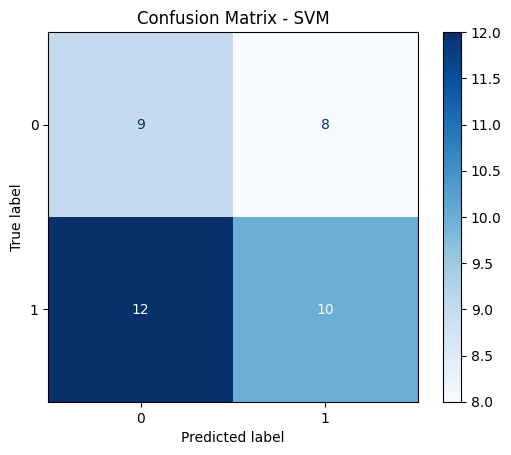

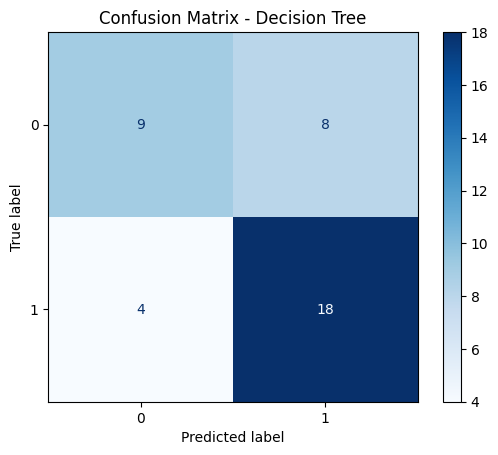

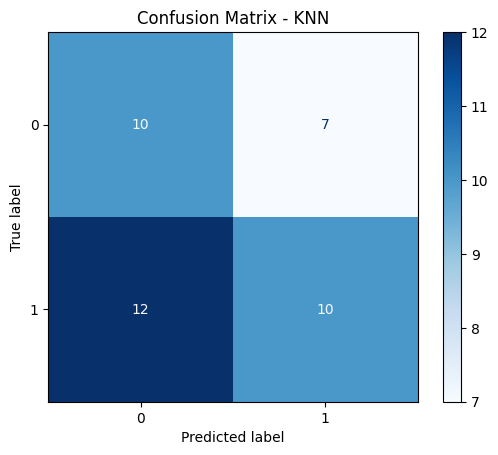

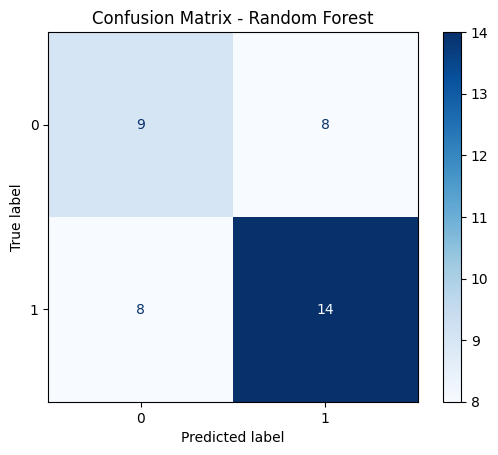

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display confusion matrices for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.grid(False)
    plt.show()


Logistic Regression Accuracy: 0.49


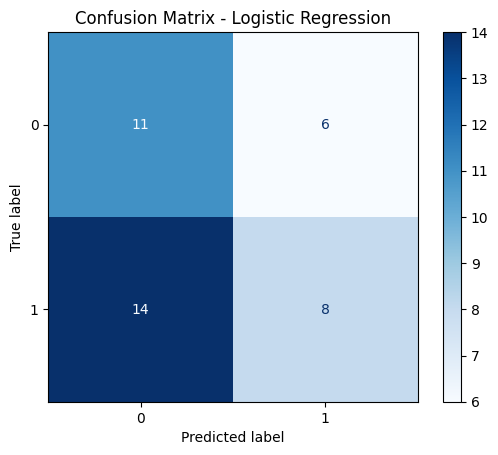

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay



# Encode categorical features
label_encoders = {}
for col in ['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop('Growth_Milestone', axis=1)
y = df['Growth_Milestone']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions and accuracy
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.grid(False)
plt.show()


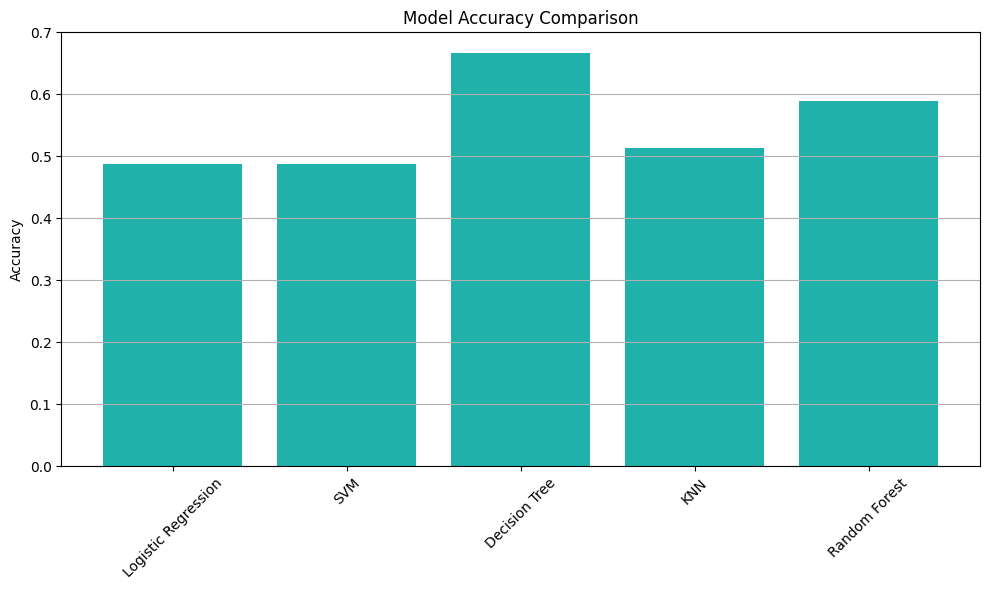

In [22]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train models and evaluate
accuracies = {}
conf_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# 📊 Plot model accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='lightseagreen')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Random Forest Accuracy: 0.62


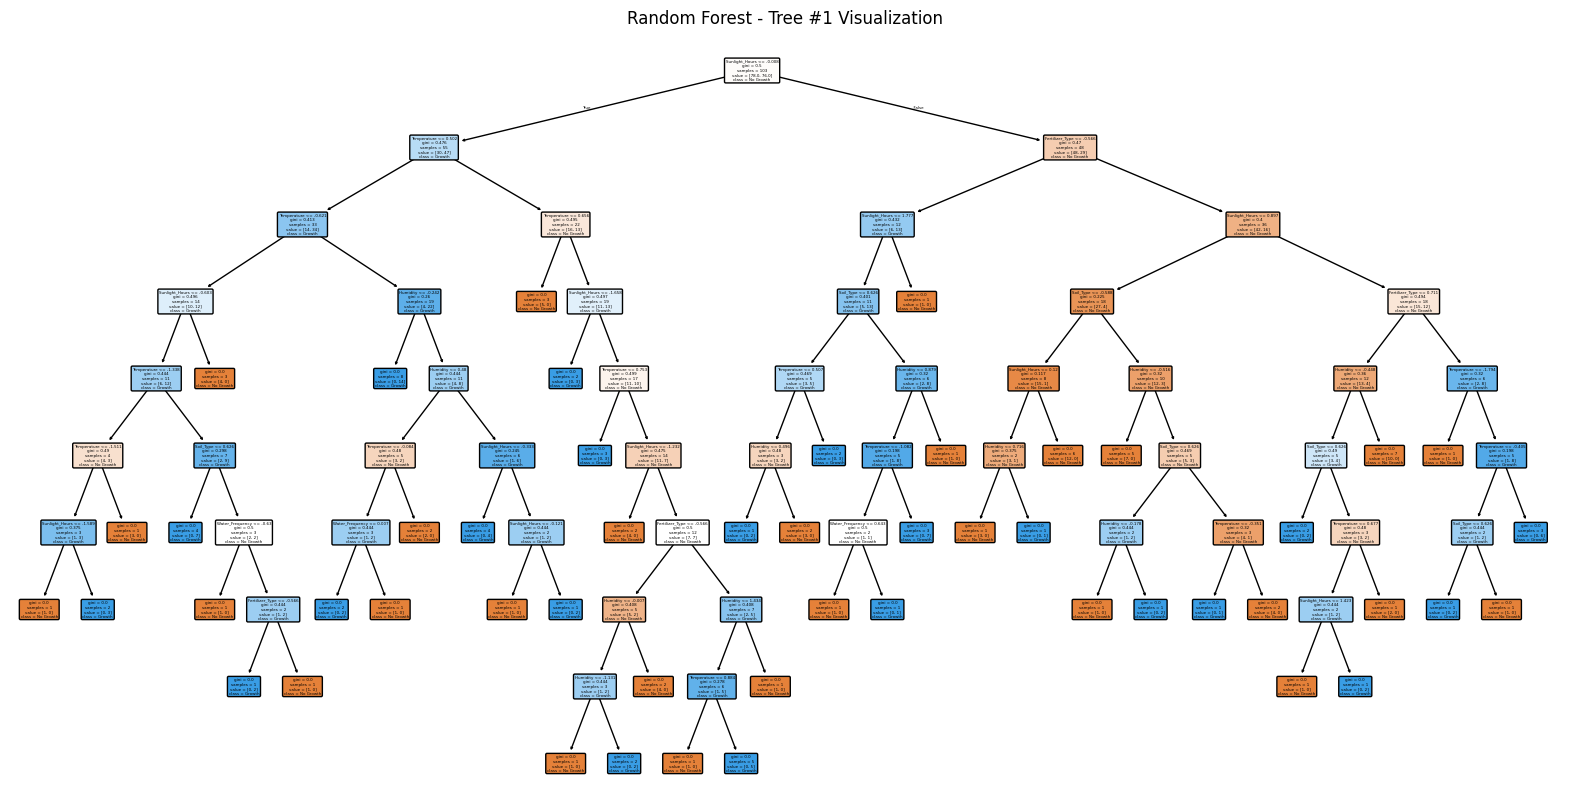

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree



# Encode categorical features
label_encoders = {}
for col in ['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop('Growth_Milestone', axis=1)
y = df['Growth_Milestone']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Accuracy and prediction
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")


# 🌳 Visualize one tree from the forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0],  # First tree in the forest
          feature_names=X.columns,
          class_names=['No Growth', 'Growth'],
          filled=True, rounded=True)
plt.title("Random Forest - Tree #1 Visualization")
plt.show()


In [43]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [44]:
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Model Accuracy: 51.28%

Confusion Matrix:
 [[10  7]
 [12 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.59      0.51        17
           1       0.59      0.45      0.51        22

    accuracy                           0.51        39
   macro avg       0.52      0.52      0.51        39
weighted avg       0.53      0.51      0.51        39



In [26]:

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.tree import plot_tree


# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 📊 Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📈 Random Forest Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1 Score  : {f1:.2f}")




📈 Random Forest Model Evaluation Metrics:
Accuracy  : 0.62
Precision : 0.65
Recall    : 0.68
F1 Score  : 0.67


In [27]:

# Define models
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Evaluate all models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# Create and display a DataFrame
results_df = pd.DataFrame(results)
print("📊 Evaluation Metrics for Different Models:")
print(results_df.round(2))

📊 Evaluation Metrics for Different Models:
           Model  Accuracy  Precision  Recall  F1 Score
0            SVM      0.49       0.56    0.45      0.50
1  Random Forest      0.62       0.65    0.68      0.67
2  Decision Tree      0.64       0.67    0.73      0.70
3            KNN      0.51       0.59    0.45      0.51
